# **Pertemuan 08: UTS Mini Project ML**

|  Nama | NIM |
| :--- | :--- |
| Muhammad Zaky Farhan | 105841110523 |

**Tujuan Praktikum:**

Praktikum terakhir ini ditujukan untuk mengukur pemahaman utuh mengenai tahapan pembuatan model pembelajaran mesin dari awal sampai akhir. Rangkaian tahapan ini mencakup proses mengenali bentuk asli data terlebih dahulu, membersihkan dan menyiapkan datanya agar siap diproses, melatih beberapa algoritma sekaligus untuk dibandingkan kemampuannya, hingga merangkum seluruh hasil hitungan menjadi sebuah kesimpulan yang jelas dan masuk akal.  Untuk mengerjakan proyek ini, tersedia tiga pilihan project yang bisa diambil, yaitu membuat model tebakan kategori (*classification*), model tebakan angka biasa (*regression*), atau model pengelompokan data (*clustering*).

Untuk pengerjaan laporan ini, jenis proyek yang dipilih adalah klasifikasi. Pilihan klasifikasi ini diambil karena bentuknya paling pas dengan data riwayat pengunjung toko daring yang akan dipakai. Tujuan utama dari pengolahan datanya nanti adalah untuk menebak dua kemungkinan yang pasti, yaitu apakah seorang pengunjung akan berakhir melakukan pembayaran atau hanya sekadar berkunjung tanpa membeli apa-apa.

## 1) Definisi Masalah dan Eksplorasi Dataset

Tahap awal proyek ini adalah melihat masalah pada situs belanja daring, yaitu banyaknya pengunjung yang hanya melihat-lihat tanpa melakukan pembelian. Tujuan pengerjaan ini adalah membuat model algoritma yang bisa membedakan mana pengunjung yang kemungkinan besar akan berbelanja (kategori True) dan mana pengunjung yang tidak berbelanja (kategori False), berdasarkan catatan tingkah laku mereka selama membuka halaman situs.

Data yang dipakai bernama *Online Shoppers Purchasing Intention*, yang berisi 12.330 catatan kunjungan dengan 18 kolom keterangan. Keterangan ini memuat persentase pengunjung yang langsung keluar dari situs, sampai waktu yang dihabiskan untuk melihat barang. Pengecekan jumlah data target sangat penting untuk dilakukan di awal, karena perbedaan jumlah antara pembeli dan bukan pembeli biasanya sangat jauh. Selisih ini bisa membuat model algoritma menjadi berat sebelah saat mempelajari datanya.

Penulisan kode dimulai dengan memanggil alat bantu `pandas` untuk mengolah tabel data, `seaborn` dan `matplotlib.pyplot` untuk menggambar grafik, `numpy` untuk hitungan angka, dan `display` dari `IPython` agar bentuk tabel yang ditampilkan terlihat rapi. Data asli dimasukkan menggunakan perintah `pd.read_csv`. Perintah `print` dipakai beberapa kali untuk menampilkan judul dan keterangan. Perintah `df.shape` digunakan untuk menghitung total baris dan kolom pada data. Perintah `df.columns` dipanggil untuk menampilkan nama-nama kolom fiturnya. Untuk mengecek porsi data target, perintah `value_counts` dijalankan pada kolom target bernama `Revenue`. Tambahan parameter `normalize=True` yang dikalikan dengan angka 100 digunakan untuk mengubah hasil hitungannya menjadi bentuk persentase, lalu hasilnya dicetak ke layar untuk dilihat perbandingannya. Perintah `display(df.head())` dipanggil untuk memunculkan lima baris pertama dari tabel datanya.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Memuat dataset primer
df = pd.read_csv('online_shoppers_intention.csv')

print("\n1) PROBLEM & DATASET\n")
print("Masalah : Prediksi intensi konversi pengunjung e-commerce (Revenue True/False)")
print("Tujuan  : Memprediksi apakah pengunjung akan melakukan transaksi atau tidak")
print("Sumber  : UCI Machine Learning Repository (Online Shoppers Intention)")

print("\nInformasi Dimensi Dataset:")
print(f"Total Observasi : {df.shape[0]}")
print(f"Total Variabel   : {df.shape[1]}")

print(f"\nFitur        : {len(df.columns) - 1} fitur (numerik & kategorikal)")
print(f"Daftar Fitur : {list(df.columns[:-1])}")
print(f"Target       : Revenue (True/False)")

# Analisis Distribusi Target untuk Konfirmasi Ketimpangan Kelas
target_dist = df['Revenue'].value_counts(normalize=True) * 100
print("\nPersentase Distribusi Target Revenue:")
print(df['Revenue'].value_counts().rename({False: "False (Tidak Beli)", True: "True (Beli)"}))
print(target_dist.map("{:.2f}%".format))

display(df.head())


1) PROBLEM & DATASET

Masalah : Prediksi intensi konversi pengunjung e-commerce (Revenue True/False)
Tujuan  : Memprediksi apakah pengunjung akan melakukan transaksi atau tidak
Sumber  : UCI Machine Learning Repository (Online Shoppers Intention)

Informasi Dimensi Dataset:
Total Observasi : 12330
Total Variabel   : 18

Fitur        : 17 fitur (numerik & kategorikal)
Daftar Fitur : ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
Target       : Revenue (True/False)

Persentase Distribusi Target Revenue:
Revenue
False (Tidak Beli)    10422
True (Beli)            1908
Name: count, dtype: int64
Revenue
False    84.53%
True     15.47%
Name: proportion, dtype: object


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Dari total 12.330 catatan kunjungan, hanya 1.908 kunjungan yang berakhir dengan transaksi pembayaran, atau sekitar 15.47 persen. Sisanya sebanyak 10.422 kunjungan atau sekitar 84.53 persen tidak menghasilkan transaksi sama sekali. Selisih persentase yang jauh ini membuktikan bahwa datanya sangat tidak seimbang. Model algoritma nantinya harus diberi pengaturan tambahan agar tidak mengabaikan data pembeli yang jumlahnya sedikit ini.

## 2) Exploratory Data Analysis (EDA)

Proses berikutnya adalah memeriksa isi data untuk melihat hubungan antar kolom informasinya. Perhatian utama diarahkan pada kolom `PageValues`, yang berisi nilai rata-rata dari halaman web yang sering dikunjungi orang sebelum mereka melakukan pembayaran. Angka pada kolom ini digambar menjadi grafik untuk melihat apakah nilainya bisa dipakai sebagai patokan utama. Hitungan kunjungan di tiap bulan juga digambar untuk melihat kapan situs tersebut paling ramai. Sebuah tabel warna juga dibuat untuk melihat apakah ada kolom angka yang isinya saling mirip.

Pengaturan `sns.set_style` dipakai untuk memberi garis latar pada grafik. Perintah `plt.subplots(2, 3)` membuat sebuah kanvas yang berisi enam area gambar dengan pola dua baris dan tiga kolom. Pengisian gambar pertama memakai perintah `.plot(kind='pie')` untuk membuat diagram lingkaran berisi persentase data target. Gambar kedua menggunakan `sns.boxplot` untuk melihat perbandingan angka `PageValues` antara kelompok pembeli dan bukan pembeli. Gambar ketiga memakai `sns.countplot` untuk menghitung jumlah kunjungan per bulan. Gambar keempat dan kelima menggunakan `sns.histplot` ditambah `kde=True` untuk menggambar sebaran persentase pengunjung yang keluar dan durasi waktu kunjungannya. Gambar keenam memakai `sns.heatmap` untuk menampilkan warna yang menandakan kuatnya hubungan antar kolom angka yang disaring lewat `select_dtypes`. Perintah `plt.tight_layout()` dipanggil supaya jarak antar gambar tidak berdempetan, lalu `plt.show()` menampilkan gambar utuhnya.

Setelah grafiknya tampil, perintah `df.duplicated().sum()` dipanggil untuk menghitung jumlah baris data yang isinya sama persis, dan `df.isnull().sum().sum()` dipanggil untuk memastikan tidak ada sel tabel yang kosong. Angka rata-rata kemudian dicari menggunakan fungsi `.mean()` pada kolom `PageValues` untuk kelompok pembeli dan bukan pembeli secara terpisah. Semua hasil hitungan ini digabungkan dengan teks menggunakan format *f-string* lalu dicetak ke layar.


2) EDA



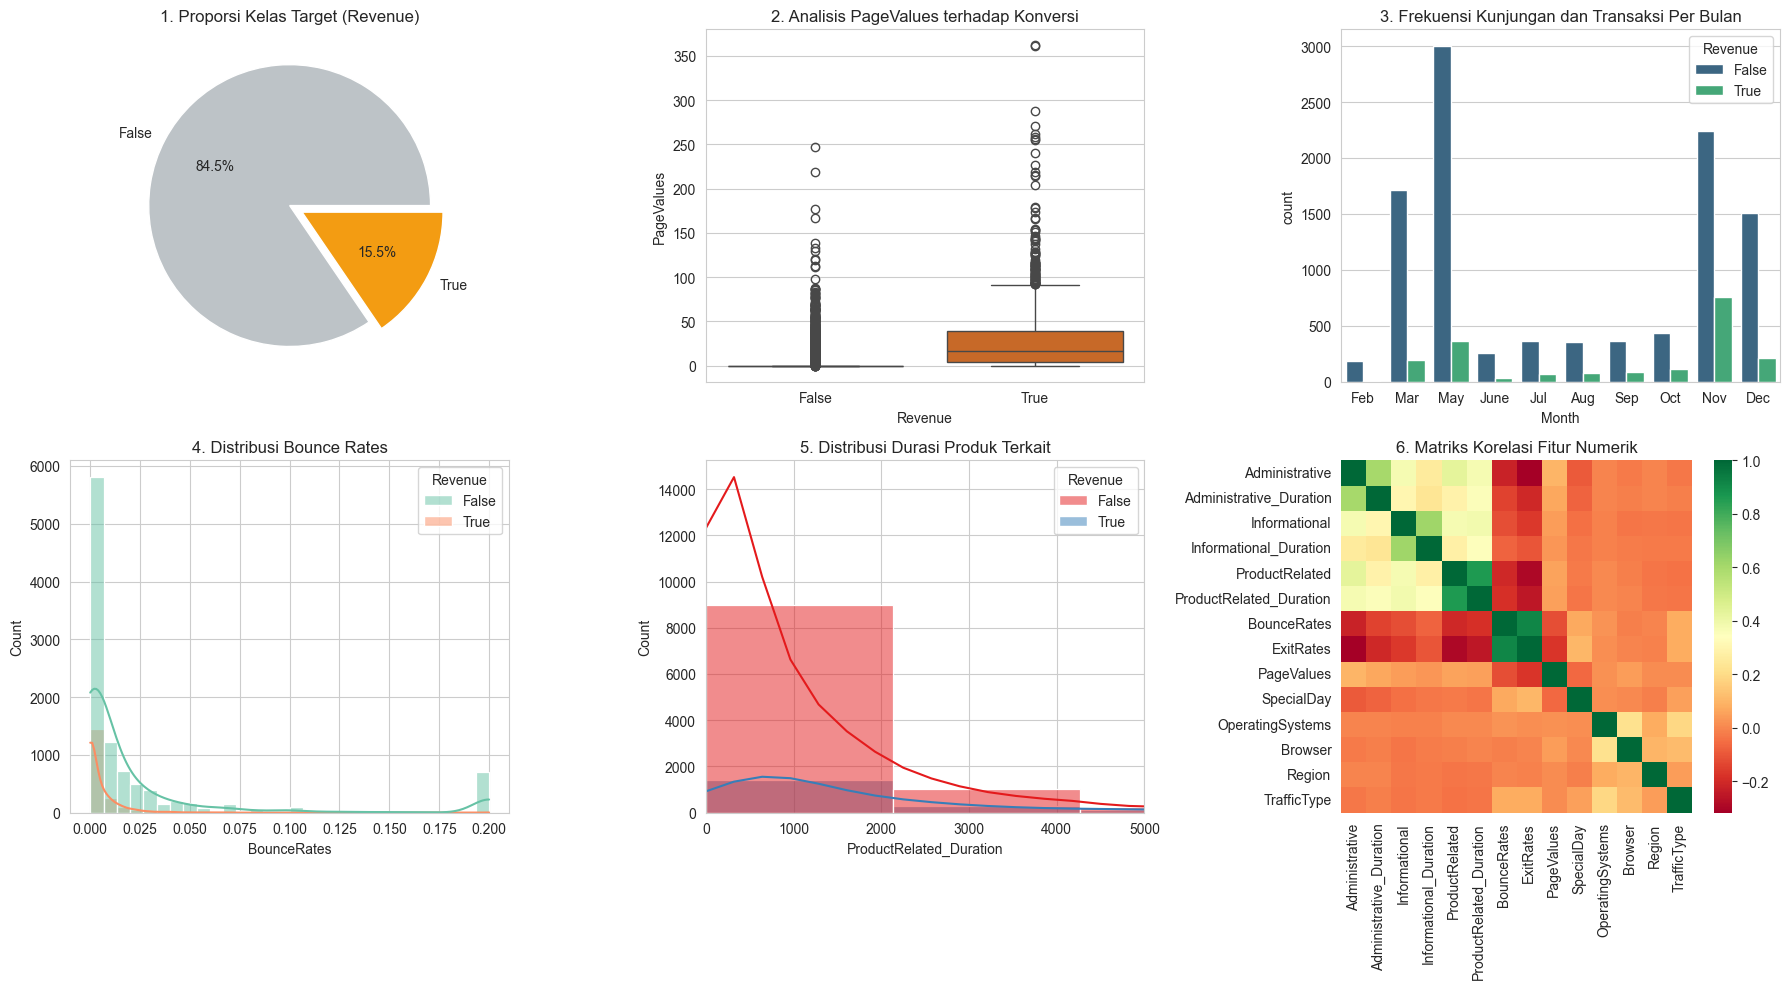


Analisis Kualitas Data:
Jumlah Data Duplikat : 125
Total Missing Values : 0

5 Insight:
  1. Dataset sangat imbalanced: 84.5% pengunjung tidak beli (False), dan hanya 15.5% yang beli (True).
  2. Fitur PageValues sangat membedakan pembeli dan bukan pembeli. Rata-rata PageValues pembeli (27.3) jauh lebih tinggi dari bukan pembeli (2.0).
  3. Terdapat 125 baris duplikat yang perlu dihapus pada tahap preprocessing.
  4. Bulan November mencatat volume kunjungan dan transaksi tertinggi, kemungkinan karena event diskon akhir tahun.
  5. Fitur BounceRates dan ExitRates memiliki korelasi positif yang sangat kuat, sehingga berpotensi redundan (multikolinearitas).


In [2]:
import warnings
warnings.filterwarnings('ignore')

print("\n2) EDA\n")

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Visualisasi 1: Distribusi Target
df['Revenue'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0,0], colors=['#bdc3c7', '#f39c12'], explode=[0, 0.1])
axes[0,0].set_title("1. Proporsi Kelas Target (Revenue)")
axes[0,0].set_ylabel('')

# Visualisasi 2: Box Plot PageValues (Prediktor Terkuat)
sns.boxplot(x='Revenue', y='PageValues', data=df, ax=axes[0,1], palette='YlOrBr')
axes[0,1].set_title("2. Analisis PageValues terhadap Konversi")

# Visualisasi 3: Tren Musiman Berdasarkan Bulan
sns.countplot(x='Month', hue='Revenue', data=df, ax=axes[0,2], order=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], palette='viridis')
axes[0,2].set_title("3. Frekuensi Kunjungan dan Transaksi Per Bulan")

# Visualisasi 4: Histogram BounceRates
sns.histplot(data=df, x='BounceRates', hue='Revenue', bins=30, kde=True, ax=axes[1,0], palette='Set2')
axes[1,0].set_title("4. Distribusi Bounce Rates")

# Visualisasi 5: Distribusi ProductRelated_Duration
sns.histplot(data=df, x='ProductRelated_Duration', hue='Revenue', bins=30, kde=True, ax=axes[1,1], palette='Set1')
axes[1,1].set_xlim(0, 5000)
axes[1,1].set_title("5. Distribusi Durasi Produk Terkait")

# Visualisasi 6: Heatmap Korelasi Numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), cmap='RdYlGn', ax=axes[1,2], annot=False)
axes[1,2].set_title("6. Matriks Korelasi Fitur Numerik")

plt.tight_layout()
plt.show()

print("\nAnalisis Kualitas Data:")
print(f"Jumlah Data Duplikat : {df.duplicated().sum()}")
print(f"Total Missing Values : {df.isnull().sum().sum()}")

print("\n5 Insight:")
true_pct = (df['Revenue'] == True).mean() * 100
pagevalues_true = df[df['Revenue']==True]['PageValues'].mean()
pagevalues_false = df[df['Revenue']==False]['PageValues'].mean()

print(f"  1. Dataset sangat imbalanced: {100-true_pct:.1f}% pengunjung tidak beli (False), dan hanya {true_pct:.1f}% yang beli (True).")
print(f"  2. Fitur PageValues sangat membedakan pembeli dan bukan pembeli. Rata-rata PageValues pembeli ({pagevalues_true:.1f}) jauh lebih tinggi dari bukan pembeli ({pagevalues_false:.1f}).")
print(f"  3. Terdapat {df.duplicated().sum()} baris duplikat yang perlu dihapus pada tahap preprocessing.")
print(f"  4. Bulan November mencatat volume kunjungan dan transaksi tertinggi, kemungkinan karena event diskon akhir tahun.")
print(f"  5. Fitur BounceRates dan ExitRates memiliki korelasi positif yang sangat kuat, sehingga berpotensi redundan (multikolinearitas).")

Bisa ditengok bahwa rata-rata nilai `PageValues` milik kelompok pembeli berada di angka 27.3, lebih tinggi dibanding kelompok bukan pembeli yang berada di angka 2.0. Perbedaan ini menandakan kalau fitur ini sangat berguna untuk dijadikan patokan tebakan. Selain itu, ditemukan 125 baris data ganda yang harus dibuang agar algoritma tidak membaca data yang sama berulang kali. Bulan November tercatat sebagai bulan paling ramai untuk kunjungan dan transaksi. Pada tabel warna, nilai hubungan yang sangat tinggi terlihat antara kolom `BounceRates` dan `ExitRates`, yang berarti kedua kolom ini memuat keterangan yang hampir sama dan bisa dipertimbangkan untuk disederhanakan nanti.

## 3) Prapemrosesan Data (Preprocessing)

Berdasarkan informasi dari tahap pemeriksaan tadi, data mulai disiapkan. Baris data yang ganda dibuang, keterangan yang berupa teks diubah menjadi angka urut, batas angka dipasang untuk durasi waktu yang terlalu panjang, rentang angkanya disamakan, dan porsi data pembeli ditambah supaya seimbang dengan data bukan pembeli.

Langkah penyiapan data pertama adalah menjalankan fungsi `drop_duplicates()` untuk membuang baris yang sama persis dan menyimpannya di variabel `df_proc`. Langkah kedua adalah membuat lima kolom baru yang berisi hitungan rasio waktu per halaman, didapat dari membagi angka durasi dengan jumlah halaman. Sebuah nilai sangat kecil bernama `epsilon` ditambahkan pada pembagi agar program tidak error jika secara kebetulan membagi dengan angka nol.

Langkah ketiga adalah mengubah nama bulan menjadi urutan angka memakai bantuan kamus (*dictionary*) dan fungsi `.map()`. Kolom lain yang isinya berupa teks diubah tipenya memakai `.astype(str)`. Fungsi `pd.get_dummies` kemudian dipakai untuk mengubah kolom teks tersebut menjadi kolom-kolom baru yang isinya hanya angka 0 dan 1. Parameter `drop_first=True` dipasang untuk membuang satu kolom awal hasil perubahan supaya tidak terjadi tumpang tindih hitungan yang bisa membingungkan algoritma.

Langkah keempat mengatasi angka batas atas. Sebuah perulangan memeriksa fitur durasi, menghitung batas 99 persen dengan `quantile(0.99)`, lalu menggunakan fungsi `np.where` untuk memotong semua angka yang melebihi batas agar nilainya menjadi sama dengan angka batas tersebut. Cara ini dipakai agar baris data tidak perlu dibuang tapi angkanya tetap wajar.

Langkah kelima memakai `train_test_split` untuk membagi data menjadi dua porsi. Variabel target disimpan di variabel `y` dan sisanya di variabel `X`. Porsi data diatur supaya 20 persen dipakai untuk ujian, dan ditambah aturan `stratify=y` agar porsi pembeli dan bukan pembeli terbagi rata di bagian latihan dan ujian.

Langkah terakhir menggunakan `StandardScaler` untuk menyamakan skala angka lewat `.fit_transform()` pada data latihan dan `.transform()` pada data ujian. Kelas `SMOTE` kemudian dipakai lewat perintah `.fit_resample()` untuk menciptakan data tambahan khusus di area data latihan supaya porsi kelas pembeli menjadi seimbang. Setiap langkah ini diiringi dengan perintah `print` untuk mencetak jumlah baris terbarunya.

In [3]:
print("\n3) PREPROCESSING\n")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Pembersihan Data
df_proc = df.drop_duplicates().copy()
print(f"1. Drop Duplicates: Dimensi data menjadi {df_proc.shape}.")
print("   Alasan: Menghapus baris identik untuk mencegah model belajar dari data redundan yang bisa memicu overfitting.\n")

# 2. Feature Engineering: Rasio Waktu per Halaman
epsilon = 1e-5
df_proc['Admin_Time_Per_Page'] = df_proc['Administrative_Duration'] / (df_proc['Administrative'] + epsilon)
df_proc['Info_Time_Per_Page'] = df_proc['Informational_Duration'] / (df_proc['Informational'] + epsilon)
df_proc['Product_Time_Per_Page'] = df_proc['ProductRelated_Duration'] / (df_proc['ProductRelated'] + epsilon)
df_proc['Total_Pages'] = df_proc['Administrative'] + df_proc['Informational'] + df_proc['ProductRelated']
df_proc['Total_Duration'] = df_proc['Administrative_Duration'] + df_proc['Informational_Duration'] + df_proc['ProductRelated_Duration']
print("2. Feature Engineering: Menambahkan 5 fitur interaksi baru.")
print("   Alasan: Rasio waktu per halaman memberikan sinyal intensitas ketertarikan pengunjung yang lebih kuat daripada angka mentah.\n")

# 3. Transformasi Kategorikal & Encoding
month_ordinal = {'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_proc.loc[:, 'Month'] = df_proc['Month'].map(month_ordinal)

cat_cols = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
for col in cat_cols:
    df_proc[col] = df_proc[col].astype(str)

df_ml = pd.get_dummies(df_proc, columns=cat_cols, drop_first=True)
df_ml['Weekend'] = df_ml['Weekend'].astype(int)
df_ml['Revenue'] = df_ml['Revenue'].astype(int)
print(f"3. One-Hot Encoding: Total fitur bertambah menjadi {df_ml.shape[1] - 1}.")
print("   Alasan: Mengubah data nominal (OS, Browser) menjadi biner agar model tidak menganggap ID tersebut memiliki urutan numerik.\n")

# 4. Penanganan Outlier dengan Winsorization
dur_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 
                'Admin_Time_Per_Page', 'Info_Time_Per_Page', 'Product_Time_Per_Page']
for col in dur_features:
    limit = df_ml[col].quantile(0.99)
    df_ml[col] = np.where(df_ml[col] > limit, limit, df_ml[col])
print("4. Winsorization (Capping 99%): Menangani outlier ekstrim.")
print("   Alasan: Membatasi nilai ekstrim agar tidak mendistorsi distribusi fitur tanpa kehilangan baris data yang berharga.\n")

# 5. Pemisahan Data
X = df_ml.drop('Revenue', axis=1)
y = df_ml['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"5. Train-Test Split: {X_train.shape[0]} Latih | {X_test.shape[0]} Uji.")
print("   Alasan: Menggunakan stratifikasi agar proporsi target (Revenue) tetap seimbang di kedua set data.\n")

# 6. Scaling & SMOTE untuk Modeling Awal
scaler = StandardScaler()
X_train_scaled_init = scaler.fit_transform(X_train)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled_init, y_train)
X_test_scaled = scaler.transform(X_test)
print(f"6. SMOTE & Scaling: Data latih setelah balancing menjadi {X_train_res.shape[0]} sampel.")
print("   Alasan: Menyamakan skala fitur untuk model berbasis jarak dan menyeimbangkan kelas target agar model tidak bias.\n")

print(f"Preprocessing Selesai. Dimensi Akhir Fitur: {X_train_res.shape[1]}")


3) PREPROCESSING

1. Drop Duplicates: Dimensi data menjadi (12205, 18).
   Alasan: Menghapus baris identik untuk mencegah model belajar dari data redundan yang bisa memicu overfitting.

2. Feature Engineering: Menambahkan 5 fitur interaksi baru.
   Alasan: Rasio waktu per halaman memberikan sinyal intensitas ketertarikan pengunjung yang lebih kuat daripada angka mentah.

3. One-Hot Encoding: Total fitur bertambah menjadi 65.
   Alasan: Mengubah data nominal (OS, Browser) menjadi biner agar model tidak menganggap ID tersebut memiliki urutan numerik.

4. Winsorization (Capping 99%): Menangani outlier ekstrim.
   Alasan: Membatasi nilai ekstrim agar tidak mendistorsi distribusi fitur tanpa kehilangan baris data yang berharga.

5. Train-Test Split: 9764 Latih | 2441 Uji.
   Alasan: Menggunakan stratifikasi agar proporsi target (Revenue) tetap seimbang di kedua set data.

6. SMOTE & Scaling: Data latih setelah balancing menjadi 16476 sampel.
   Alasan: Menyamakan skala fitur untuk model be

  File "C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Pembuangan data ganda menyisakan 12.205 baris. Proses perubahan teks menjadi angka 0 dan 1 membuat jumlah fitur bertambah menjadi 65 kolom. Data lalu dipotong menyisakan 9.764 baris untuk dilatih dan 2.441 baris untuk dites. Setelah proses penyeimbangan dengan membuat data tambahan, jumlah data latih bertambah menjadi 16.476 baris. Bertambahnya jumlah baris ini menandakan bahwa porsi kelas pembeli yang tadinya sedikit sudah ditambah jumlahnya supaya seimbang dan siap dipakai untuk melatih algoritma tanpa ada bias.

## 4) (Pengembangan Model) Modeling

Pada tahap ini, lima algoritma klasifikasi disiapkan untuk dicoba satu per satu pada data yang sudah disiapkan tadi. Kelima algoritma ini adalah Logistic Regression, KNN, Decision Tree, Random Forest, dan Gradient Boosting. Penilaian hasilnya difokuskan pada skor F1 untuk melihat keseimbangan antara ketepatan dan kemampuan algoritma mengenali pembeli, serta tambahan skor ROC-AUC untuk melihat kemampuan algoritma memisahkan kedua kelompok pengunjung.

Penjelasan kode dimulai dengan memanggil alat ukur `f1_score`, `accuracy_score`, dan `roc_auc_score` berserta kelima algoritma tadi. Semua algoritma dimasukkan ke dalam satu daftar penampung bernama `model_pool`. Sebuah perulangan `for` dipakai untuk memanggil algoritma ini secara bergantian. Di dalam perulangan, setiap algoritma dilatih untuk mengenali pola memakai perintah `.fit()` pada data latihan `X_train_res` yang sudah seimbang.

Setelah dilatih, perintah `.predict()` dijalankan untuk menghasilkan tebakan angka 0 dan 1 pada data ujian `X_test_scaled`, lalu `.predict_proba()` dijalankan untuk mengambil angka peluang dari tebakan tersebut. Hasil tebakan ini dimasukkan ke fungsi ukur untuk dicari nilai akurasi, F1, dan ROC-AUC. Semua skor dari masing-masing algoritma dicatat dan dikumpulkan ke dalam variabel `metrics_log`. Wadah ini lalu diubah bentuknya menjadi tabel memakai perintah `pd.DataFrame`, dan diurutkan posisinya berdasarkan angka F1 tertinggi menggunakan `.sort_values`. Tabel ini dimunculkan ke layar memakai fungsi `display` dengan tambahan `.style.background_gradient` supaya tabelnya memiliki warna yang sesuai dengan besaran angkanya.

In [4]:
print("\n4) MODELING\n")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
import pandas as pd

# Pastikan menggunakan X_train_res dan X_test_scaled hasil preprocessing terbaru
model_pool = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

metrics_log = []
for name, model in model_pool.items():
    # Menggunakan X_train_res (data latih yang sudah di-scale dan di-SMOTE)
    model.fit(X_train_res, y_train_res)
    # Menggunakan X_test_scaled (data uji yang sudah di-scale)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    metrics_log.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    })

performance_df = pd.DataFrame(metrics_log).sort_values(by='F1-Score', ascending=False)
display(performance_df.style.background_gradient(cmap='YlGn'))


4) MODELING



,Model,Accuracy,F1-Score,ROC-AUC
4,Gradient Boosting,0.891848,0.681159,0.934467
2,Decision Tree,0.884474,0.677346,0.908798
3,Random Forest,0.888161,0.668287,0.916370
0,Logistic Regression,0.868906,0.646018,0.902971
1,KNN,0.719377,0.404865,0.730981


Tabel yang muncul menyajikan urutan kemampuan kelima algoritma. Gradient Boosting berada di posisi pertama dengan nilai F1 sebesar 0.6811 dan nilai ROC-AUC 0.9344. Di bawahnya ada Decision Tree dan Random Forest, disusul Logistic Regression, dan KNN yang berada di urutan paling bawah. Nilai F1 dari Gradient Boosting ini menunjukkan bahwa algoritma tersebut memiliki takaran yang paling seimbang saat membedakan pembeli asli tanpa banyak melakukan kesalahan pada pengunjung biasa. Berdasarkan urutan ini, Gradient Boosting dipilih untuk diproses pada tahapan berikutnya.

## 5) Hyperparameter Tuning 

Tahap ini bertujuan memperbaiki kemampuan algoritma yang terpilih dengan cara mencari kombinasi pengaturan angka (parameter) yang paling pas. Pencarian ini dilakukan menggunakan Pipeline yang menggabungkan proses penyesuaian angka, penyeimbangan data, dan algoritma menjadi satu kesatuan yang urut.

Penulisan kode dimulai dengan mengambil nama algoritma terbaik dari baris pertama tabel sebelumnya menggunakan perintah `.iloc[0]`. Sebuah fungsi bernama `create_advanced_pipeline` dibuat menggunakan `ImbPipeline`. Fungsi ini merangkai `StandardScaler`, alat penyeimbang `SMOTE`, dan algoritma ke dalam satu alur. Penyatuan ini dilakukan supaya data tambahan dari SMOTE tidak ikut terhitung saat proses pengujian pada tahap lipatan data (cross-validation).

Sebuah aturan bersyarat `if-elif-else` disusun untuk menyiapkan daftar pilihan pengaturan bagi setiap algoritma yang mungkin terpilih. Jika algoritma Random Forest yang terpilih, pengaturan yang disiapkan meliputi jumlah pohon (`n_estimators`), batas kedalaman pohon (`max_depth`), batas minimal jumlah data di ujung daun (`min_samples_leaf`), jumlah maksimal fitur yang dipakai (`max_features`), dan penyeimbang bobot kelas (`class_weight`). Jika algoritma Gradient Boosting yang terpilih, pengaturannya meliputi jumlah pohon, kecepatan belajar (`learning_rate`), maksimal kedalaman pohon, dan porsi sampel data yang dipakai (`subsample`). Untuk Logistic Regression, angka yang dicoba adalah tingkat toleransi kesalahan (`C`) dan metode pencarian pola (`solver`). Sedangkan untuk Decision Tree, pengaturan yang dicoba adalah batasan kedalaman pohon dan batas minimal jumlah data untuk memecah cabang (`min_samples_split`).

Karena Gradient Boosting yang terpilih di sini, daftar parameternya dimasukkan ke dalam fungsi `GridSearchCV` untuk dites. Parameter `cv=5` dipakai agar datanya dilipat dan dites sebanyak lima kali bergantian, dengan patokan penilaian `scoring='f1'`. Setelah proses uji coba berjalan lewat perintah `.fit()`, pengaturan yang menghasilkan skor tertinggi diambil melalui `.best_estimator_` dan disimpan di variabel `final_model`. Algoritma hasil penyesuaian ini lalu dipakai untuk menebak ulang data ujian. Hasilnya digambar ke layar menggunakan `plt.subplots` untuk menyiapkan dua area kanvas. Fungsi `sns.heatmap` dipakai untuk menggambar kotak benar salah tebakan dari `confusion_matrix`. Gambar satunya diisi oleh `RocCurveDisplay` untuk menampilkan garis lengkung ketepatan algoritma. Angka rinciannya lalu dicetak lewat `classification_report`.


5) TUNING

Memulai optimasi cerdas untuk arsitektur: Gradient Boosting...
Kombinasi Parameter Elit: {'model_engine__learning_rate': 0.05, 'model_engine__max_depth': 4, 'model_engine__n_estimators': 200, 'model_engine__subsample': 1.0}

Komparasi Efektivitas Gradient Boosting:
Baseline F1-Score  : 0.6812
Optimized F1-Score : 0.6876


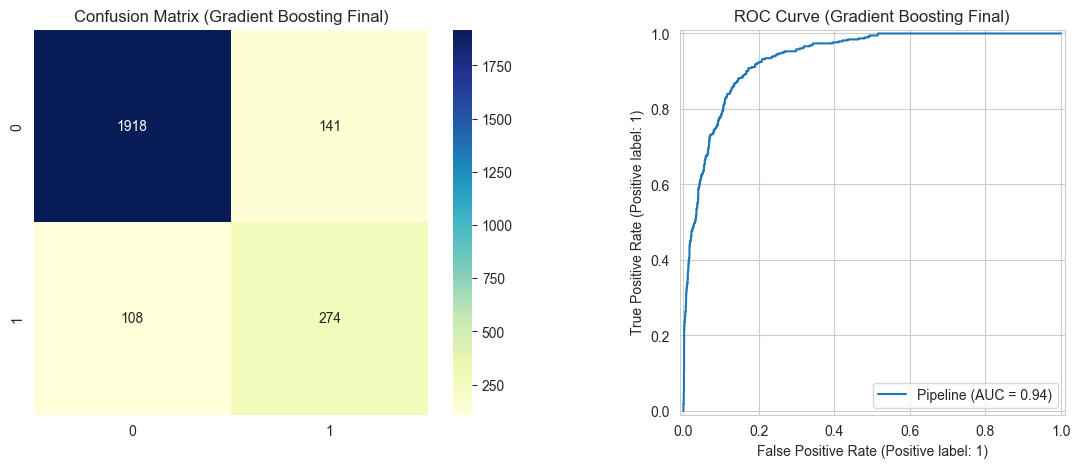


Detailing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2059
           1       0.66      0.72      0.69       382

    accuracy                           0.90      2441
   macro avg       0.80      0.82      0.81      2441
weighted avg       0.90      0.90      0.90      2441

Final Test Accuracy: 0.8980


In [5]:
print("\n5) TUNING\n")

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
from imblearn.pipeline import Pipeline as ImbPipeline

# Mendeteksi model terbaik secara dinamis dari tabel perbandingan arsitektur sebelumnya
champion_model_name = performance_df.iloc[0]['Model']
base_f1_score = performance_df.iloc[0]['F1-Score']

# Mengkonstruksi pipeline standar untuk mencegah data leakage selama proses Cross-Validation
def create_advanced_pipeline(classifier_obj):
    return ImbPipeline([
        ('std_scaler', StandardScaler()),
        ('oversampler', SMOTE(random_state=42, sampling_strategy=0.5)),
        ('model_engine', classifier_obj)
    ])

# Logika pemilihan ruang pencarian (Hyperparameter Grid) berdasarkan performa terbaik
if "Random Forest" in champion_model_name:
    model_instance = RandomForestClassifier(random_state=42, n_jobs=-1)
    hyper_params = {
        'model_engine__n_estimators': [300, 600],
        'model_engine__max_depth': [25, None],
        'model_engine__min_samples_leaf': [2, 4],
        'model_engine__max_features': ['sqrt', 0.6],
        'model_engine__class_weight': ['balanced_subsample']
    }
elif "Gradient Boosting" in champion_model_name:
    model_instance = GradientBoostingClassifier(random_state=42)
    hyper_params = {
        'model_engine__n_estimators': [200, 400],
        'model_engine__learning_rate': [0.05, 0.1],
        'model_engine__max_depth': [4, 6],
        'model_engine__subsample': [0.85, 1.0]
    }
elif "Logistic" in champion_model_name:
    model_instance = LogisticRegression(max_iter=2000, random_state=42)
    hyper_params = {
        'model_engine__C': [0.1, 1.0, 10.0],
        'model_engine__solver': ['lbfgs', 'liblinear']
    }
else:
    model_instance = DecisionTreeClassifier(random_state=42)
    hyper_params = {
        'model_engine__max_depth': [10, 20, None],
        'model_engine__min_samples_split': [5, 10]
    }

print(f"Memulai optimasi cerdas untuk arsitektur: {champion_model_name}...")
tuning_pipeline = create_advanced_pipeline(model_instance)
search_conductor = GridSearchCV(tuning_pipeline, hyper_params, cv=5, scoring='f1', n_jobs=-1)
search_conductor.fit(X_train, y_train)

print(f"Kombinasi Parameter Elit: {search_conductor.best_params_}")

final_model = search_conductor.best_estimator_
y_test_pred = final_model.predict(X_test)
optimized_f1 = f1_score(y_test, y_test_pred)

print(f"\nKomparasi Efektivitas {champion_model_name}:")
print(f"Baseline F1-Score  : {base_f1_score:.4f}")
print(f"Optimized F1-Score : {optimized_f1:.4f}")

# Visualisasi Evaluasi Akhir
fig, (ax_conf, ax_roc) = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='YlGnBu', ax=ax_conf)
ax_conf.set_title(f"Confusion Matrix ({champion_model_name} Final)")
RocCurveDisplay.from_estimator(final_model, X_test, y_test, ax=ax_roc)
ax_roc.set_title(f"ROC Curve ({champion_model_name} Final)")
plt.show()

print("\nDetailing Classification Report:")
print(classification_report(y_test, y_test_pred))
print(f"Final Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

Teks hasil uji coba menampilkan pengaturan yang paling cocok untuk Gradient Boosting. Pengaturannya adalah kecepatan belajar 0.05, maksimal kedalaman pohon 4, jumlah pohon 200, dan pemakaian sampel penuh 1.0. Pengaturan ini menaikkan nilai F1 dari 0.6812 menjadi 0.6876. Gambar kotak tebakan di layar menjabarkan hasilnya: algoritma berhasil menebak 1.918 pengunjung biasa dan 274 pembeli asli dengan tepat. Algoritma ini salah menebak 141 pengunjung biasa yang dikira pembeli, dan melewatkan 108 pembeli asli yang malah dikira pengunjung biasa. Gambar lengkungan kurva ROC yang ditarik tinggi mendekati sudut kiri atas menunjukkan bahwa algoritma ini sudah tergolong baik dalam memisahkan kedua kelompok pengunjung tersebut. Akurasinya jadinya meningkat dari sebelum tuning itu 0.8918, setelah tuning jadi 0.8980.

## 6) Kesimpulan

Model terbaik yang didapatkan dari seluruh proses uji coba ini adalah Gradient Boosting. Algoritma ini terpilih karena berhasil mencatat skor F1 paling tinggi di angka 0.6876 setelah pengaturan di dalamnya disesuaikan. Pemakaian alur terpadu atau Pipeline yang menggabungkan alat SMOTE dan algoritma secara langsung sangat membantu menjaga hasil pengujian tetap jujur. Cara ini memastikan tidak ada data buatan yang ikut masuk ke area data ujian selama proses uji coba silang berjalan, sehingga nilai ketepatan algoritma yang dihasilkan benar-benar murni dan bisa diandalkan untuk menebak data yang belum pernah dilihat sebelumnya.

Untuk tahap perbaikan algoritma berikutnya, sangat disarankan untuk melakukan proses pemilihan fitur ulang. Proses ini bertujuan untuk membuang beberapa kolom informasi yang dinilai kurang memberikan pengaruh pada hasil tebakan. Pengurangan jumlah fitur ini akan membuat algoritma bekerja lebih cepat dan menghitung lebih ringan, tanpa mengurangi ketepatan tebakannya. Selain itu, mencoba rentang angka pengaturan yang lebih luas pada tahap uji coba juga bisa dilakukan untuk melihat apakah skor F1 algoritma ini masih bisa dinaikkan lagi.

Sementara itu, untuk penerapan di bidang bisnis, ada beberapa saran operasional yang bisa dijalankan. Pertama, karena kolom `PageValues` selalu menjadi penentu paling kuat untuk mengenali ciri pembeli, pengelola situs disarankan untuk fokus memperbaiki tampilan dan kelengkapan informasi pada halaman-halaman yang punya nilai kunjungan tinggi. Kedua, algoritma yang sudah terlatih ini bisa dipasang langsung pada sistem situs. Ketika algoritma mengenali gerak-gerik seorang pengunjung yang mirip dengan ciri pembeli tapi ia tak kunjung menuju halaman pembayaran, situs bisa diatur untuk memunculkan kupon potongan harga secara otomatis di layarnya agar ia segera berbelanja.